Import a test signal

In [4]:
import os
import scipy.io.wavfile as wav
import IPython

from google.colab import drive
drive.mount('/content/gdrive/')

os.chdir('/content/gdrive/My Drive/speech_commands_v0.01/bed')
fs, audio = wav.read('541e4079_nohash_0.wav')
IPython.display.Audio(audio, rate=fs)





Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


There are a lot of useful feature extraction tools in the Librosa library.  Choose the best fft size, hop_length, and other parameters for the function
https://librosa.org/doc/latest/feature.html

Text(0.5, 1.0, 'chroma stft')

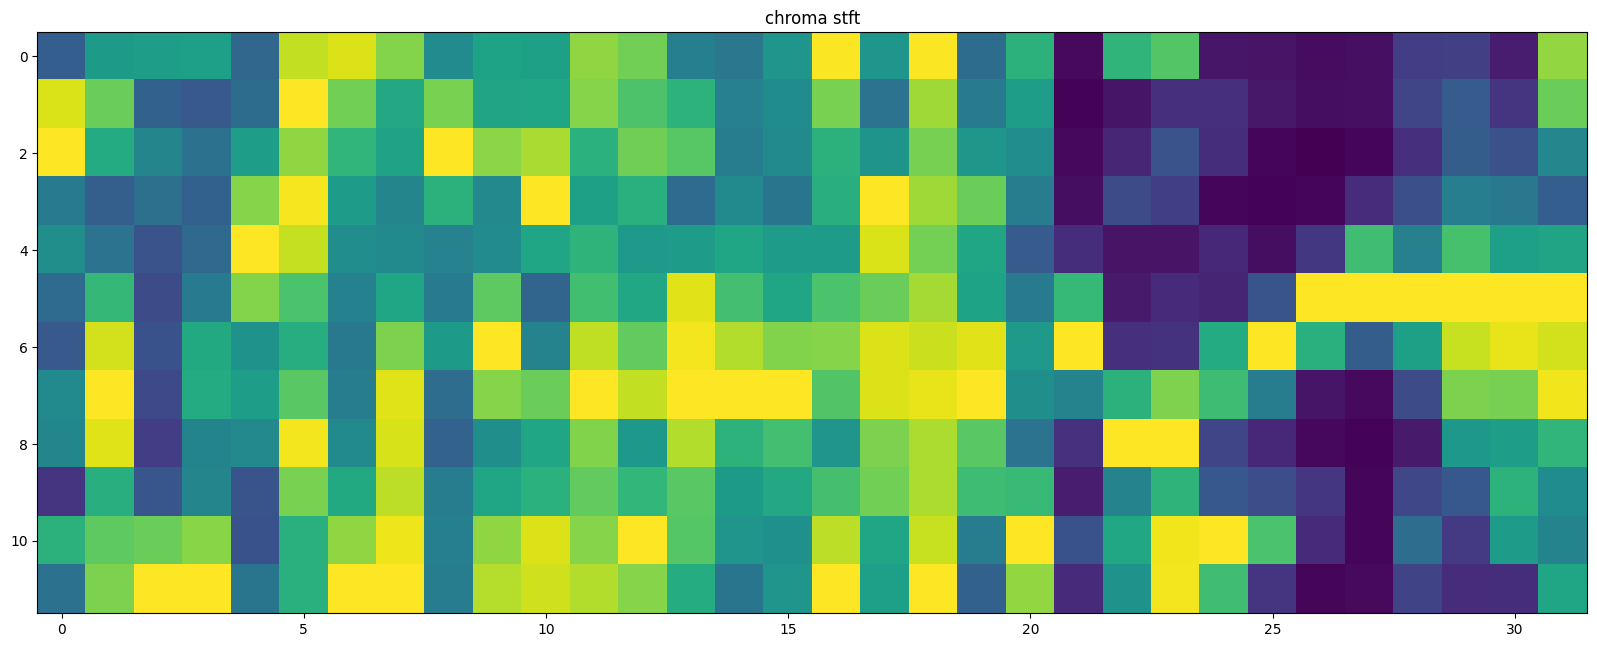

In [12]:
import librosa.feature as lf
import matplotlib.pyplot as plt


audio_f=audio.astype(float)

out=lf.chroma_stft(y=audio_f, sr=fs, n_fft=512)



plt.figure(figsize=(20,10), dpi=100)
plt.imshow(out)
plt.title('chroma stft')

Text(0.5, 1.0, 'mfcc')

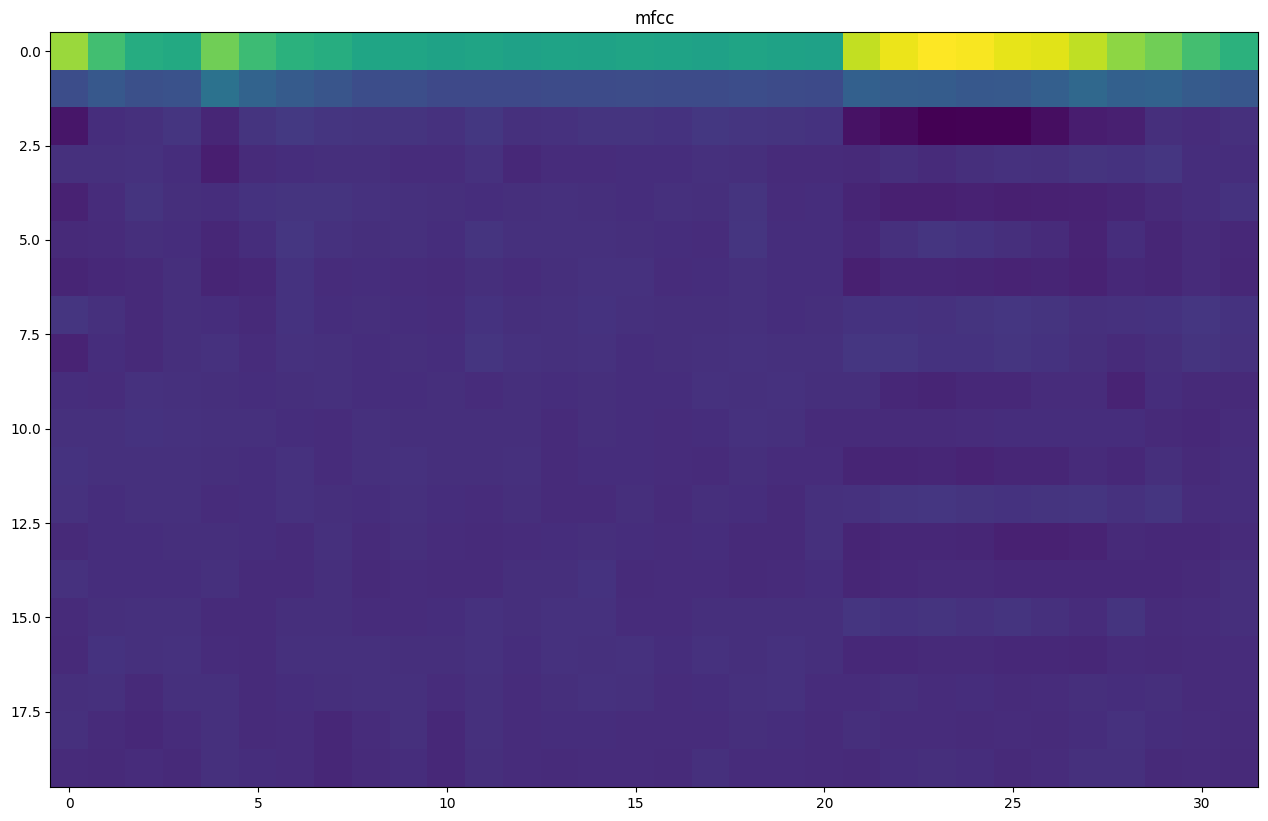

In [13]:
import librosa.feature as lf
import matplotlib.pyplot as plt


audio_f=audio.astype(float)

out=lf.mfcc(y=audio_f, sr=fs, n_fft=512)



plt.figure(figsize=(20,10), dpi=100)
plt.imshow(out)
plt.title('mfcc')

Text(0.5, 1.0, 'mfcc')

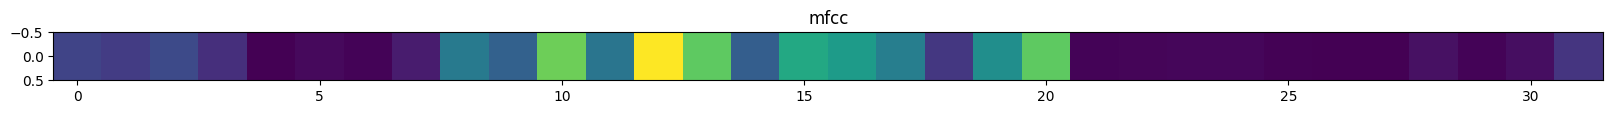

In [15]:
import librosa.feature as lf
import matplotlib.pyplot as plt


audio_f=audio.astype(float)

out=lf.spectral_flatness(y=audio_f, n_fft=512)



plt.figure(figsize=(20,10), dpi=100)
plt.imshow(out)
plt.title('mfcc')

You can also concatenate features to make a bigger feature vector

Text(0.5, 1.0, 'chroma_stft, mfcc')

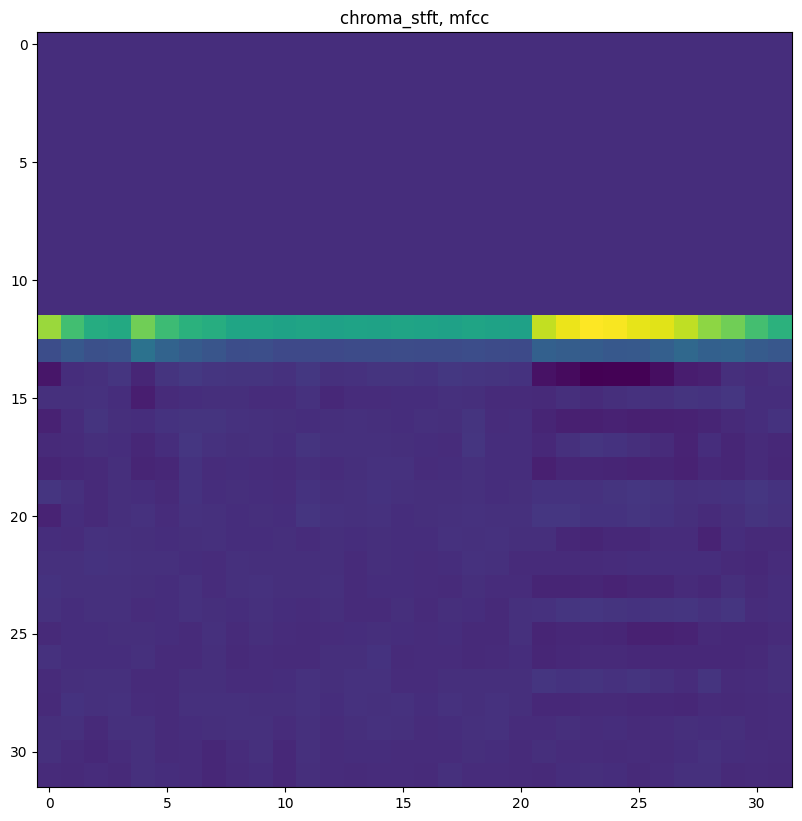

In [20]:
import numpy as np
out1=lf.chroma_stft(y=audio_f, sr=fs, n_fft=512)
out2=lf.mfcc(y=audio_f, sr=fs, n_fft=512)

out=np.vstack((out1,out2))
plt.figure(figsize=(20,10), dpi=100)
plt.imshow(out)
plt.title('chroma_stft, mfcc')

Librosa also has a lot of good speech enhancement methods: http://man.hubwiz.com/docset/LibROSA.docset/Contents/Resources/Documents/effects.html

Also check out Scipy for some common DSP operations like filtering https://docs.scipy.org/doc/scipy/reference/signal.html

In [24]:
import librosa.effects as le

out=le.pitch_shift(y=audio_f, sr=fs,n_steps=2, bins_per_octave=2)
IPython.display.Audio(out, rate=fs)

In [25]:
import librosa.effects as le

out=le.time_stretch(y=audio_f, rate=0.5)
IPython.display.Audio(out, rate=fs)

If you prefer to do the feature processing in MATLAB then you may do so.  Just create the matrix of data points X together with its corresponding labels y in MATLAB and store the .mat files in your google drive.  You can then upload them to the notebook with the following code.  There are a variety of feature extraction and speech enhancement tools written in MATLAB like: http://www.ee.ic.ac.uk/hp/staff/dmb/voicebox/voicebox.html .  You will need to download the relevant signals onto your computer and do the processing there.

In [ ]:
import numpy as np
import scipy.io as sio
import sklearn
from sklearn.model_selection import train_test_split


X=sio.loadmat('feat_vec.mat') #change the name to what you named your variables
y=sio.loadmat('labels.mat') #change the name to what you named your variables

X_data=X['feat_vec'] #change the name to what you named your variables
y_data=y['labels'] #change the name to what you named your variables


X_train_val, X_test, y_train_val, y_test= train_test_split(X_data, y_data, test_size=0.15)

X_train, X_val, y_train, y_val= train_test_split(X_train_val, y_train_val, test_size=0.15)



print ('Training/Valid data shape: {}'.format(X_train_val.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_val.shape))
print ('Test target shape: {}'.format(y_test.shape))